<a href="https://colab.research.google.com/github/laura314159265/poly/blob/main/SIMULACI%C3%93_A/angle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

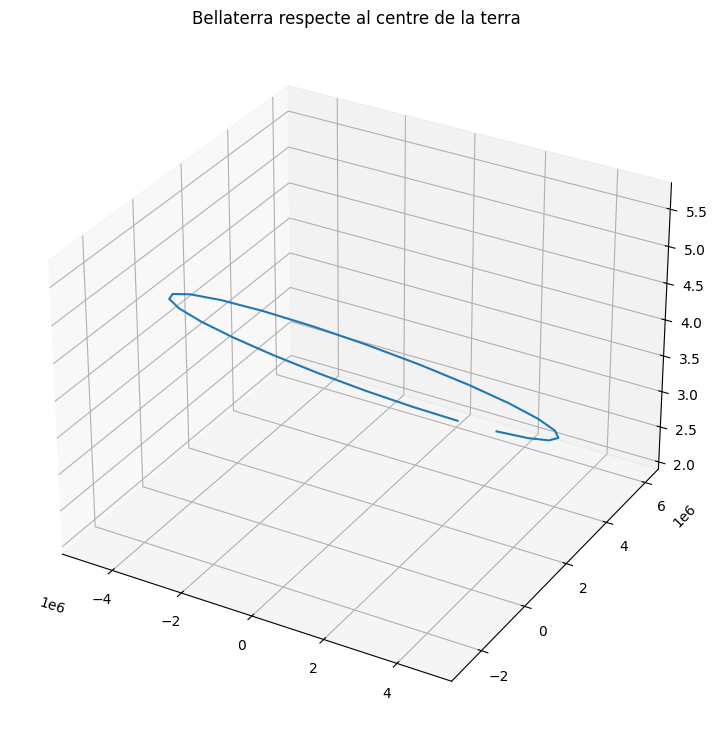

8762


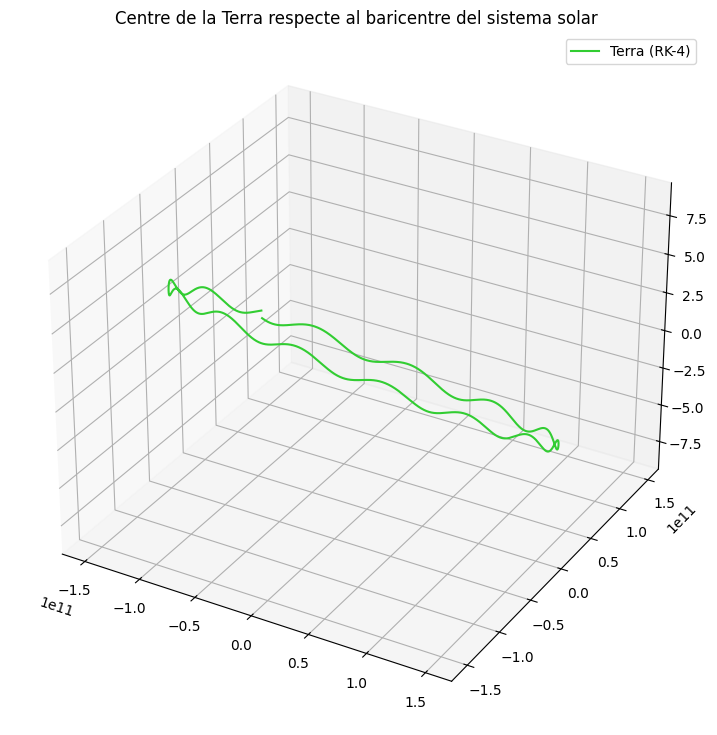

[-0.95064548 -0.92756701 -0.85925763 ... -0.8586404  -0.92724771
 -0.95064574]


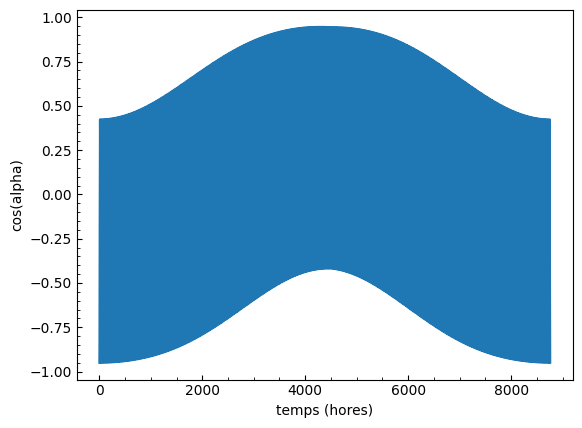

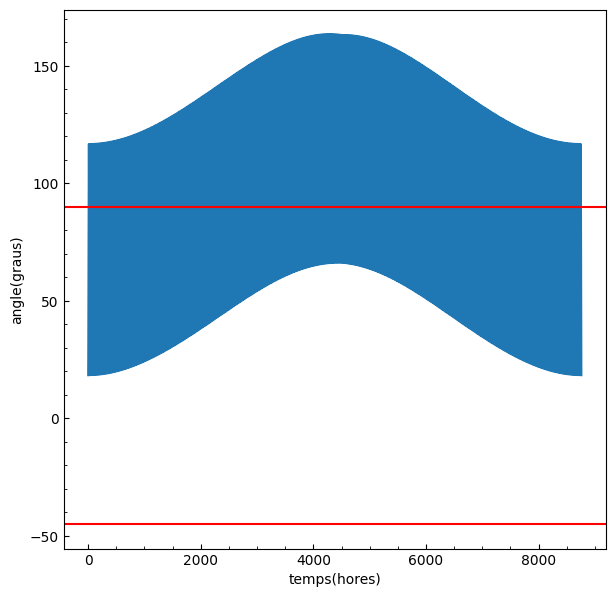

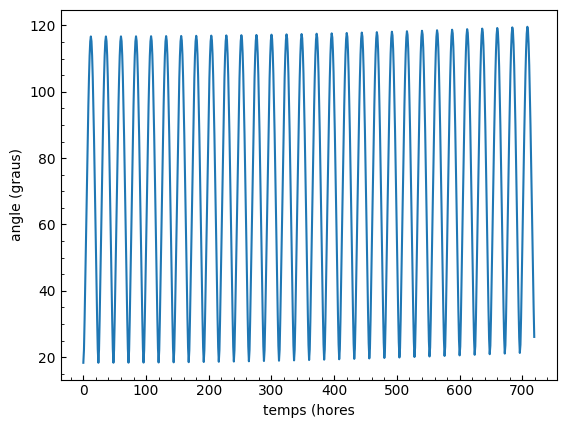

AQUI 18.327112112914484 64.68060691458743


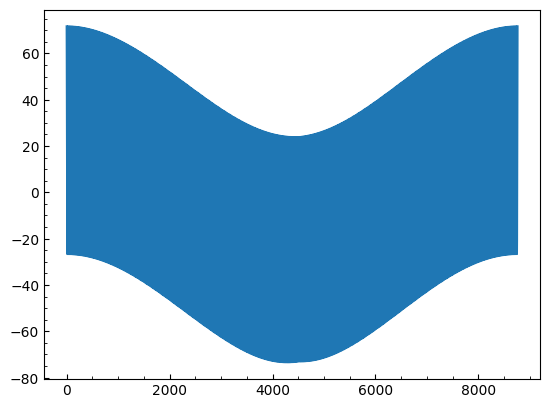

-6.008944452768915 3.614886299751035
32.81782157762146
[0.31548669 0.38294833 0.53697967 0.72217465 0.9168533  1.11209417
 1.30255371 1.48350059 1.64953625 1.79383828 1.90786538 1.982067
 2.0082669  1.98310107 1.9098059  1.79649397 1.65271778 1.48705117
 1.30635092 1.11603855 0.92084945 0.72609605 0.54057327 0.38552597]
8762


In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Dades en unitats del SI
G= 6.67430e-11
m_sol= 1.98847e30
m_terra= 5.97219e24
m_lluna= 7.349e22
m_mart= 6.4171e23

# Condicions inicials (en cartesianes)
# L'origen és el baricentre del sistema solar
# Format: [x,y,z,vx,vy,vz]
# Inici a les 13:59 del 21 de Juny del 2025 (solstici d'estiu)
# Això és per el temps central Europeu, per tant hi ha un lleuger error
# Ja que no està a Bellaterra/Barcelona exactament
# Posicions en kilometres i velocitats en km/s

lluna= np.array([-1.223926839954494E+05, -1.526112945830738E+08, 5.512426765490323E+04, 2.865929048320844E+01, 7.673984990113614E-01, 6.367954754048094E-02])
terra= np.array([-4.133776082794621E+05, -1.528302631740358E+08, 3.242787546376139E+04, 2.932642969193051E+01, -7.378251008835289E-02, -1.172300942425906E-03])
sol= np.array([-6.709778526787314E+05, -8.035450223548296E+05, 2.366174814126350E+04, 1.263745636318025E-02, -3.212119035252178E-03, -2.265926685896345E-04])
mart= np.array([-2.457240245390437E+08, -2.253913894859833E+07, 5.577461384361338E+06, 3.057555929366051E+00, -2.206677199548648E+01, -5.372712135532627E-01])

# Normalització
t0= 86400.0            # Temps característic= 1 dia
m0= m_sol              # Massa característica= massa del sol
r0= (G * t0**2 * m0)**(1/3)  # Radi característic

def normalitza(cos):
  pos = cos[:3]*(1/r0)*10**3
  vel = cos[3:]*(t0/r0)*10**3
  return pos, vel

masses= np.array([m_sol/m0, m_terra/m0, m_lluna/m0, m_mart/m0])
pos_sol, vel_sol= normalitza(sol)
pos_terra, vel_terra= normalitza(terra)
pos_lluna, vel_lluna= normalitza(lluna)
pos_mart, vel_mart= normalitza(mart)
posicions= np.array([pos_sol, pos_terra, pos_lluna, pos_mart])
velocitats= np.array([vel_sol, vel_terra, vel_lluna, vel_mart])

def acceleracions(pos, masses): # pos és una matriu de N files i 3 columnes
    N= len(masses) # Nombre de cossos: planetes, el Sol i la Lluna
    acc= np.zeros_like(pos) # Crea un array amb la mateixa forma que pos però ple de zeros
    for i in range(N):
        for j in range(N):
            if i != j:  # Si i ≠ j, perquè un cos no s'atrau a ell mateix
                diff= pos[j] - pos[i]
                d= np.linalg.norm(diff) # Calcula la norma del vector diferència de posicions
                acc[i]= acc[i] + masses[j] * diff / d**3
    return acc

def rk4(pos, vel, masses, h):
    K1= vel
    L1= acceleracions(pos, masses)
    K2= vel + 0.5*h*L1
    L2= acceleracions(pos + 0.5*h*K1, masses)
    K3= vel + 0.5*h*L2
    L3= acceleracions(pos + 0.5*h*K2, masses)
    K4= vel + h*L3
    L4= acceleracions(pos + h*K3, masses)
    pos_nou= pos + (h/6)*(K1 + 2*K2 + 2*K3 + K4)
    vel_nou= vel + (h/6)*(L1 + 2*L2 + 2*L3 + L4)
    return pos_nou, vel_nou

t_f = 365
dt = 1/24
hores= int(t_f/dt)
passos = hores +1 #per tenir en compte que un any dura 365 dies i 6 hores afegim 5 + CI = 6 hores "extres" als 365 dies calculats

pos_hist = np.zeros((passos+1, len(masses), 3), dtype=float)
vel_hist = np.zeros((passos+1, len(masses), 3), dtype=float)
pos_hist[0] = posicions
vel_hist[0] = velocitats

for i in range(passos):
  pos_nou, vel_nou = rk4(pos_hist[i], vel_hist[i], masses, dt)
  pos_hist[i+1] = pos_nou
  vel_hist[i+1] = vel_nou

# Extreure trajectòries
idx_sol = 0
idx_terra = 1

x_t = pos_hist[:, idx_terra, 0]
y_t = pos_hist[:, idx_terra, 1]
z_t = pos_hist[:, idx_terra, 2]

x_s = pos_hist[:, idx_sol, 0]
y_s = pos_hist[:, idx_sol, 1]
z_s = pos_hist[:, idx_sol, 2]

# Volem el vector que uneix sol i terra llavors farem el vector baricentre-Terra menys el vector baricentre-Sol

R_t = 6371000 #metres
vel_ang = 2*np.pi/23.9344444 # en rad/h
theta = (23.43333333333333*2*np.pi)/360
phi= (41.505833333*2*np.pi)/360

x = np.array([0])
y = np.array([R_t*np.cos(phi-theta)])
z = np.array([R_t*np.sin(phi-theta)])

t = np.linspace(1,passos-1,passos)

# Aquestes són les coordenades del vector centre terra-bellaterra
X_b = np.concatenate((x, (-1)*R_t * np.cos(phi)*np.sin(vel_ang*t)))
Y_b = np.concatenate((y, (np.cos(phi-theta)*np.cos(vel_ang*t) + np.sin(theta)*(1-np.cos(vel_ang*t))*np.sin(phi)) * R_t))
Z_b = np.concatenate((z, (np.sin(phi-theta)*np.cos(vel_ang*t) + np.cos(theta)*(1-np.cos(vel_ang*t))*np.sin(phi)) * R_t))

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_b,y_b,z_b)
ax.set_title("Bellaterra respecte al centre de la terra")
plt.tick_params(axis="both", direction ="in")
plt.show()

x_st = r0 * (x_t - x_s)
y_st = r0 * (y_t - y_s)
z_st = r0 * (z_t - z_s)

#això és en 365 dies naturals pero un any realment dura 365 dies i 6 hores aprox així que ara afegirem la posició de bellaterra a 6 hores mes

print(len(X_b))
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_st, y_st, z_st, label="Terra (RK-4)", color="limegreen")
ax.set_title("Centre de la Terra respecte al baricentre del sistema solar")
plt.tick_params(axis="both", direction ="in")
plt.legend()
plt.show()

mod_t = np.sqrt(x_st**2 + y_st**2 + z_st**2)
Mod_b = np.sqrt(X_b**2 + Y_b**2 + Z_b**2)


cos_llista = (X_b * x_st + Y_b * y_st + Z_b * z_st)/(Mod_b * mod_t)
cos_llista = np.clip(cos_llista, -1.0, 1.0)  # Per evitar problemes numèrics degut a que farem servir la funció arcosinus

print(cos_llista)

temps = np.linspace(0,passos,passos+1)

theta_llista = np.pi - np.arccos(cos_llista) #obtenim l'angle complementari que és el que ens interessa.

plt.plot (temps,cos_llista)
plt.ylabel("cos(alpha)")
plt.xlabel("temps (hores)")
plt.tick_params(axis="both", which = "both", direction ="in")
plt.minorticks_on()
plt.show()

fig = plt.figure(figsize=(7,7))
plt.plot(temps,theta_llista*365/(2*np.pi))
plt.ylabel("angle(graus)")
plt.xlabel("temps(hores)")
plt.axhline(90, color="r")
plt.axhline(-90/2,color="r")
plt.tick_params(axis="both", which = "both", direction ="in")
plt.minorticks_on()
plt.show()

plt.plot(np.linspace(0,719,720),theta_llista[slice(720)]*365/(2*np.pi)) #això són els primers 11 dies pq es vegi més bé les oscil·lacions
plt.ylabel("angle (graus)")
plt.xlabel("temps (hores")
plt.tick_params(axis="both", which = "both", direction ="in")
plt.minorticks_on()
plt.show()

print("AQUI",theta_llista[0] *365/(2*np.pi),theta_llista[-6]*365/(2*np.pi))

plt.plot(temps,90-(theta_llista)*365/(2*np.pi))
plt.tick_params(axis="both", which = "both", direction ="in")
plt.minorticks_on()
plt.show()


horitzo = 90-(theta_llista)*365/(2*np.pi)
print(horitzo[16],horitzo[17]) #l'index 17 conté el primer valor positu del segon dia

print(horitzo[17+723])
#nota mental aquest producte ens dona l'angle que formen dos vectors amb el mateix origen, si ens fixem nosaltres volem el complementari a aquest, és a dir pi - angle, lol

print(theta_llista[:24])
print(len(X_b))


In [63]:
theta_llista_g = theta_llista *  360/ (2 * np.pi)
print("theta_llista_degrees calculated successfully.")
print(theta_llista_g[0:481])

theta_llista_degrees calculated successfully.
[ 18.07605578  21.94132293  30.76666874  41.37755976  52.53182444
  63.71830239  74.6308301   84.99832275  94.51146508 102.77936243
 109.31263398 113.56407407 115.06521736 113.62332148 109.42381789
 102.93152216  94.69375343  85.20175598  74.84839437  63.94429897
  52.76078732  41.60223897  30.97256715  22.08901076  18.08072731
  21.90010564  30.70604735  41.31057311  52.46342381  63.65100339
  74.56651779  84.93892247  94.45929186 102.73731477 109.28412741
 113.55244735 115.07253255 113.64926768 109.46581897 102.98596527
  94.75717874  85.2713752   74.9220956   64.02043299  52.83784715
  41.67828996  31.04367887  22.14386806  18.09265074  21.86511144
  30.65035388  41.24789851  52.39915762  63.58791795  74.50666721
  84.88435618  94.41241637 102.7010778  109.2619221  113.54748148
 115.08662202 113.68180412 109.5139839  103.04602259  94.8256563
  85.3455441   74.99994412  64.10044262  52.91868454  41.75828
  31.11933486  22.20460741  18.111

In [64]:
creuament = 0
for i in range(len(theta_llista_g) - 1):
    if (theta_llista_g[i] < 90 and theta_llista_g[i+1] > 90) or \
       (theta_llista_g[i] > 90 and theta_llista_g[i+1] < 90):
        creuament += 1

print(f"Es creua la línia blava (dia-nit o bé nit-dia) {creuament} cops. Per tant, han passat {creuament/2} dies, que correspon a 1 any.")

Es creua la línia blava (dia-nit o bé nit-dia) 730 cops. Per tant, han passat 365.0 dies, que correspon a 1 any.


In [65]:
index=[]
for i in range(len(horitzo) - 1):
    if horitzo[i] < 0 and horitzo[i+1] >= 0:
        index.append(i+1)
print(index)

[17, 41, 65, 89, 113, 137, 161, 185, 209, 233, 257, 281, 305, 329, 353, 377, 401, 425, 449, 473, 497, 521, 545, 569, 593, 617, 641, 665, 689, 714, 738, 762, 786, 810, 834, 858, 882, 906, 930, 954, 978, 1002, 1026, 1050, 1074, 1098, 1122, 1146, 1170, 1194, 1218, 1242, 1266, 1290, 1314, 1338, 1362, 1386, 1410, 1434, 1458, 1482, 1506, 1530, 1554, 1578, 1602, 1626, 1650, 1674, 1698, 1722, 1746, 1770, 1794, 1818, 1842, 1866, 1890, 1914, 1938, 1962, 1987, 2011, 2035, 2059, 2083, 2107, 2131, 2155, 2179, 2203, 2227, 2251, 2275, 2299, 2323, 2347, 2371, 2395, 2419, 2443, 2467, 2491, 2515, 2539, 2563, 2587, 2611, 2635, 2659, 2683, 2707, 2731, 2755, 2779, 2803, 2827, 2851, 2875, 2899, 2923, 2947, 2971, 2995, 3019, 3043, 3067, 3091, 3115, 3140, 3164, 3188, 3212, 3236, 3260, 3284, 3308, 3332, 3356, 3380, 3404, 3428, 3452, 3476, 3500, 3524, 3548, 3572, 3596, 3620, 3644, 3668, 3692, 3716, 3740, 3764, 3788, 3812, 3836, 3860, 3884, 3908, 3932, 3956, 3980, 4004, 4028, 4052, 4076, 4100, 4124, 4148, 4172, 

365
3.614886299751035
14.112044601209433
25.167585764096472
36.50642396379726
47.81995215444009
58.597258302328655
67.60419742593844
71.66815147568491
67.79572622979141
58.86747977420606
48.11566893063132
36.807917528666735
25.46495490089717
14.39783612845416
3.8813702729651567
-5.771226471969399
3.026710375312959
13.503687750797184
24.547904865806373
35.882376153402625
47.19972405300751
57.999291935546275
67.09292903789681
71.43030990646832
67.90721687936156
59.152424282290106
48.4634026994399
37.171028651642985
25.818360021312856
14.723423744165885
4.16204293340131
-5.5543823545841775
2.2359404946674744
12.714159922623395
23.761452053244938
35.097003582112954
46.4106396870925
57.20310900675891
66.31662583810886
70.84320973673533
67.6866414129333
59.16187226270184
48.56688871713028
37.30078179028022
25.93696483656707
14.804752448258924
4.18332031669901
-5.616019237549878
1.267808397023117
11.769031700252654
22.833577848117343
34.1751314208787
45.4770697168463
56.233548582605245
65.302

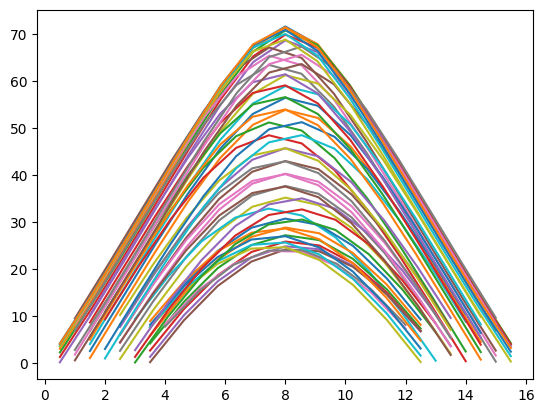

In [66]:
print(len(index))
for i in range(52):
  valors=[]
  j=0
  while True:
    print(horitzo[index[7*i]+j])
    if horitzo[index[7*i]+j] < 0:
      break
    valors.append(horitzo[index[7*i]+j])
    j = j+ 1
  plt.plot(np.linspace(8-len(valors)/2,8+len(valors)/2,len(valors)),valors)
plt.show()
